# Linear Regression

Linear Regression is an algorithm to solve regression problems. The output is a function that describes (predicts) of regressing, correlating numerical features. After training the regression model, new data should be predicted or adjusted correctly according to the prediction function.

### Procedure

1. Preprocess (and visualize) your data, assign variables for further tasks
2. Declare your hypothesis (function); also prediction function
3. Calculate the cost (loss) function of your hypothesis
4. Minimalize the cost (loss) function with gradient descent or normal equation
5. Adjust your hypothesis
6. Plot the adjusted hypothesis and the conversion of the costs

### import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import pandas as pd

## Visualization and preprocessing

In [20]:
food_data = pd.read_csv('data/food.txt', names=['population', 'profit'])
print(food_data)
food_data = np.array(food_data)

    population    profit
0       6.1101  17.59200
1       5.5277   9.13020
2       8.5186  13.66200
3       7.0032  11.85400
4       5.8598   6.82330
5       8.3829  11.88600
6       7.4764   4.34830
7       8.5781  12.00000
8       6.4862   6.59870
9       5.0546   3.81660
10      5.7107   3.25220
11     14.1640  15.50500
12      5.7340   3.15510
13      8.4084   7.22580
14      5.6407   0.71618
15      5.3794   3.51290
16      6.3654   5.30480
17      5.1301   0.56077
18      6.4296   3.65180
19      7.0708   5.38930
20      6.1891   3.13860
21     20.2700  21.76700
22      5.4901   4.26300
23      6.3261   5.18750
24      5.5649   3.08250
25     18.9450  22.63800
26     12.8280  13.50100
27     10.9570   7.04670
28     13.1760  14.69200
29     22.2030  24.14700
..         ...       ...
67     10.2360   7.77540
68      5.4994   1.01730
69     20.3410  20.99200
70     10.1360   6.67990
71      7.3345   4.02590
72      6.0062   1.27840
73      7.2259   3.34110
74      5.0269  -2.68070


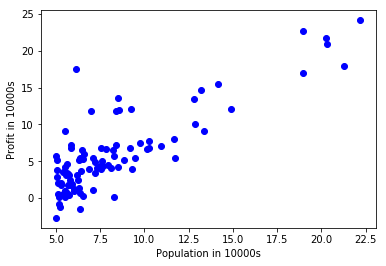

In [21]:
x = food_data[:,0]
y = food_data[:,1]

plt.scatter(x,y, c='blue')

plt.xlabel('Population in 10000s')
plt.ylabel('Profit in 10000s')
plt.show()

In [22]:
# Initial weights are arbitrary
w1 = 1.0
w2 = 1.0

w =  np.array([w1, w2]).T
print(w)

[ 1.  1.]


In [23]:
ones = np.ones(x.size) # Matrix of the (vector) size x 
X = np.vstack((x, ones)).T # second column is filled with ones as a bias
m = X[:,0].size # m is the total number of elements in x

## Hypothesis
The hypothesis is the function that describes your (regressing) data points as a linear function. It is an approximation, that is prediction, to this data. The formula according to the slides:

$f(x) = w_1x + w_2$


Long term task: different arbitrary weights (w1 and w2) result in different predictions (and change the values of the vector x). In the end of this procedure, we want the weights to be as optimal as possible to describe best the given data points.

In [25]:
def hypothesis(weight_1, weight_2, x):
    return weight_1*x + weight_2

hypothesis(w1, w2, x)

array([  7.1101,   6.5277,   9.5186,   8.0032,   6.8598,   9.3829,
         8.4764,   9.5781,   7.4862,   6.0546,   6.7107,  15.164 ,
         6.734 ,   9.4084,   6.6407,   6.3794,   7.3654,   6.1301,
         7.4296,   8.0708,   7.1891,  21.27  ,   6.4901,   7.3261,
         6.5649,  19.945 ,  13.828 ,  11.957 ,  14.176 ,  23.203 ,
         6.2524,   7.5894,  10.2482,   6.8918,   9.2111,   8.9334,
         9.0959,   6.6063,  13.836 ,   7.3534,   6.4069,   7.8825,
        12.708 ,   6.7737,   8.8247,   8.0931,   6.0702,   6.8014,
        12.7   ,   6.5416,   8.5402,   6.3077,   8.4239,   8.6031,
         7.3328,   7.3589,   7.2742,   6.6397,  10.3102,  10.4536,
         9.8254,   6.1793,  22.279 ,  15.908 ,  19.959 ,   8.2182,
         9.2951,  11.236 ,   6.4994,  21.341 ,  11.136 ,   8.3345,
         7.0062,   8.2259,   6.0269,   7.5479,   8.5386,   6.0365,
        11.274 ,   6.1077,   6.7292,   6.1884,   7.3557,  10.7687,
         7.5159,   9.5172,  10.1802,   7.002 ,   6.5204,   6.0

In [26]:
old_hypothesis = hypothesis(w1, w2, x)

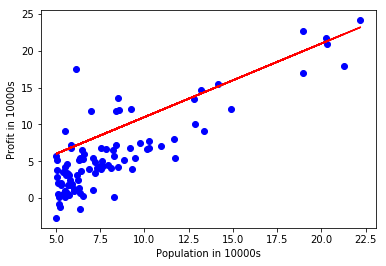

In [27]:
x = food_data[:,0]
y = food_data[:,1]

plt.scatter(x,y, c='blue')

plt.plot(x, hypothesis(w1, w2, x), c='red')

plt.xlabel('Population in 10000s')
plt.ylabel('Profit in 10000s')
plt.show()

## Cost function: Mean Squared Error (MSE)

The hypothesis function with w_1 = 1 and w_2 = 1 is not perfect, since it doesn't fit the data well. The cost function returns a number which basically reveals, how far away the hypothesis function lies from the ideal position. The closer to zero the cost,the better the prediction.

$MSE(w_1, w_2) = \frac{1}{2m} \Sigma_{i=1}^m (\hat{y}_i - y_i)^2$

In [28]:
def MSE_cost(weight_1, weight_2, x, y):
    # translate the formula into python code here
    cost = 0
    for i, vec_element in enumerate(x):
        cost += (hypothesis(weight_1, weight_2, vec_element) - y[i])**2
    return cost/(2*m)

# alternatively MSE cost function as vector representation
def MSE_cost_2(X, y, w):
    return (sum((X.dot(w) - y)**2))/(2*m)

# if you have done it right, the values are the same
print(MSE_cost(w1, w2, x, y))
print(MSE_cost_2(X, y, w))

10.2665204914
10.2665204914


# Plotting the Cost Function

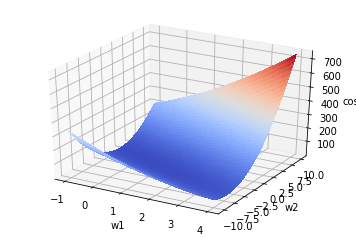

In [29]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('cost')

# Make data.
weight = np.linspace(-1, 4, 100)
intercept = np.linspace(-10, 10, 100)
xx, yy = np.meshgrid(weight, intercept)

cost_values = np.zeros((100, 100))

for i, we in enumerate(weight):
    for j, b in enumerate(intercept):
        weights = np.array([we, b])
        cost_values[i,j] = MSE_cost(we,b,x,y)
        #cost_values[i,j] = MSE_cost_2(X, y, weights)
        
# Plot the surface.
surf = ax.plot_surface(xx, yy, cost_values, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

plt.show()

### Minimize costs with Gradient Descent

Gradient descent is one possibility to minimalize the cost function and to return better fitting predictions.

The partial derivatives of $w_1$ and $w_2$:


$\frac{\partial}{\partial w_1} MSE(w_1, w_2) = \frac{1}{m}\Sigma_{i=1}^m (\hat{y}_i - y_i)x_i$


$\frac{\partial}{\partial w_2} MSE(w_1, w_2) = \frac{1}{m}\Sigma_{i=1}^m (\hat{y}_i - y_i)$


The gradient $\nabla_{\vec{w}} MSE(w_1, w_2)$ is a vector of our partial derivatives: $\nabla_{\vec{w}} MSE(w_1, w_2) = \begin{bmatrix}
\frac{\partial}{\partial w_1} MSE(w_1, w_2) \\
\frac{\partial}{\partial w_2} MSE(w_1, w_2) \\
\end{bmatrix}$. 

Repeat updating the weights with the following formula:

$w_1 = w_1 - \alpha \frac{1}{m}\Sigma_{i=1}^m (\hat{y}_i - y_i)x_i$

$w_2 = w_2 - \alpha \frac{1}{m}\Sigma_{i=1}^m (\hat{y}_i - y_i)$


In [ ]:
# Vectorized form of gradient descent

def gradient_descent(X, y, w, alpha, num_iters):
    alpha = alpha
    num_iters = num_iters
    cost_history = np.zeros((num_iters, 1))
    
    for i in range(num_iters):
        w = w - alpha * (1/m) * (X.T.dot((X.dot(w) - y)))
        cost_history[i] = cost_2(X, y, w)
    
    return w, cost_history

w_test, b_test = 1,1

test_w = np.array([w_test, b_test])
w_final, cost_history = gradient_descent(X, y, test_w, 0.02, 2000)
print(w_final)

In [30]:
#w =  np.array([1.0,1.0]).T
iterations = 2000

def gradient_descent_2(x, y, w, alpha, num_iters):
    a = alpha
    iterations = num_iters
    cost_history = np.zeros((iterations, 1))
    d = 0
    d2 = 0
    
    for i in range(iterations):
        for j, exmp in enumerate(x):
            d += (hypothesis(w[0], w[1], exmp) - y[j])*exmp
            d2 += (hypothesis(w[0], w[1], exmp) - y[j])
        w[0] = w[0] - (a * ((1/m) * d))
        w[1] = w[1] - (a * ((1/m) * d2))
        cost_history[i] = MSE_cost(w[0], w[1], x, y)
        d = 0
        d2 = 0
        
    return w, cost_history

w, cost_history = gradient_descent_2(x, y, w, 0.02, iterations)

print(w)

[ 1.19267712 -3.89223201]


### Minimize costs with Normal Equation

Alternatively to gradient descent, the costs and weights can be calculated with normal equation. Normal equation works best for a 'reasonable' amound of features _n_.

$\vec{w} = (X^TX)^{-1}X^Ty$

In [31]:
def norm_eq(X, y):
    w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return w

norm_eq(X, y)

array([ 1.19303364, -3.89578088])

### Plot the new hypothesis

Performing gradient descent or normal equation returns new weights, which can be used to calculate the new hypothesis (prediction) function.

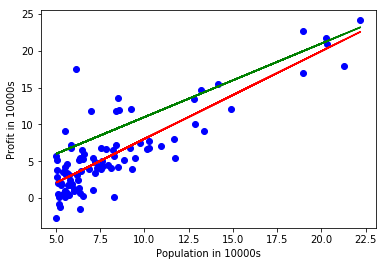

In [32]:
w1, w2 = w

plt.scatter(x,y, c='blue')

plt.plot(x, hypothesis(w1, w2, x), c='red')
plt.plot(x, old_hypothesis, c='green')

plt.xlabel('Population in 10000s')
plt.ylabel('Profit in 10000s')
plt.show()

### Plotting the costs

The new costs after each iteration can be plotted and checked for conversion.

You may change the iterations and alphas for different conversions!


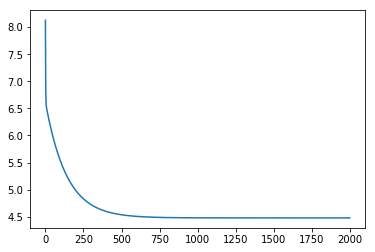

In [36]:
w =  np.array([1.0,1.0]).T
iterations = 2000
alpha = 0.02
w, cost_history = gradient_descent_2(x, y, w, alpha, iterations)

iterat = np.arange(iterations)

plt.plot(iterat, cost_history)
plt.show()